# nn module

## PyTorch: nn

Neural network의 **computation graph**와 **autograph**는 복잡한 연산들을 정의하고, 도함수, 즉 결과 값을 미분하여서 얻은 값 (dy/dx),를 자동으로 계산하는데에 매우 강력한 **PyTorch paradigm**이다. 하지만 규모가 큰 신경망에서는 autograd 만으로는 너무나 원초적인 **low-level** machine learning library라고 할 수 있다. 

Neural network를 구성할 때 우리는 연산을 여러 계층으로 배열한다. 이런 계층들 안에는 network의 학습 중에 최적화가 되어야 할 **학습가능한 매개 변수들**이 포함되어 있다. 

**TensorFlow 2.0**의 **Keras, TensorFlow-Slim, TKLearn**과 같은 **higher-level**의 computation packeage는 원초적인, 또는 low-level package에서는  neural network를 구축하는데 유용한 library를 제공한다. 

PyTorch에서는 nn 패키지가 neural network를 구축하는데 유용한 좀 더 고차원의 package를 제공한다. **nn** 패키지는 neural network의 layer들을 정의하는 모듈 의 집합으로 정의된다. 모듈은 입력 Tensor를 받고 출력 Tensor를 계산하는 한편, 학습 가능한 매개변수를 포함하는 Tensor와 같은 내부 상태(internal state)를 갖습니다. 또한, nn 패키지는 신경망을 학습시킬 때 주로 사용하는 유용한 손실 함수들도 정의합니다.

이번 예제에서는 nn 패키지를 사용하여 2-계층 신경망을 구성해보겠습니다:

In [0]:
# 먼저 pytorch package를 import 하고
import torch 

In [0]:
N, D_in, H, D_out = 64, 1000, 100, 10

In [0]:
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

In [0]:
# nn 패키지를 사용하여 모델을 순차적인 계층(Sequence of layers)으로 정의한다. 이것은 Keras의 그것과 유사하다. 
# nn.Sequential은 다른 모듈들을 포함하는 모듈로, 그 모듈들을 순차적으로 적용하여 출력을 생성한다. 
# 각각의 선형(Linear) 모듈은 선형 함수를 사용하여 입력으로부터 출력을 계산하고, 
# 가중치와 편향(Bias)을 저장하기 위해 내부적인 Tensor를 가진다. 

model = torch.nn.Sequential(torch.nn.Linear(D_in, H), 
                            torch.nn.ReLU(), 
                            torch.nn.Linear(H, D_out))

In [0]:
# 또한, nn 패키지에는 널리 사용하는 손실 함수들에 대한 정의도 포함하고 있습니다;
# 여기에서는 평균 제곱 오차(MSE; Mean Squared Error)를 손실 함수로 사용하겠습니다.

loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate = 1e-4

In [0]:
steps = []
loss_value = []

In [20]:
for t in range(500):
  y_pred = model(x)
  
  loss = loss_fn(y_pred, y)
  
  print(t, loss.item())
  
  steps.append(t)
  loss_value.append(loss)
  
  model.zero_grad()
  
  loss.backward()
  
  #optimization 
  
  with torch.no_grad():
    for param in model.parameters():
      param -= learning_rate*param.grad

0 665.89501953125
1 618.945556640625
2 577.6686401367188
3 541.3551025390625
4 509.0990295410156
5 479.9004821777344
6 453.1453552246094
7 428.353271484375
8 405.3090515136719
9 383.89453125
10 363.86614990234375
11 345.09844970703125
12 327.2638244628906
13 310.35504150390625
14 294.2064208984375
15 278.7832336425781
16 264.0525817871094
17 250.04312133789062
18 236.60487365722656
19 223.74752807617188
20 211.5482635498047
21 199.95765686035156
22 188.90811157226562
23 178.37860107421875
24 168.38072204589844
25 158.87367248535156
26 149.8403778076172
27 141.23846435546875
28 133.0855255126953
29 125.34663391113281
30 118.0093002319336
31 111.07089233398438
32 104.52941131591797
33 98.35913848876953
34 92.53713989257812
35 87.05220031738281
36 81.88484191894531
37 77.0213851928711
38 72.45442962646484
39 68.15213775634766
40 64.10696411132812
41 60.31444549560547
42 56.75251388549805
43 53.41161346435547
44 50.274906158447266
45 47.335086822509766
46 44.557106018066406
47 41.950046539

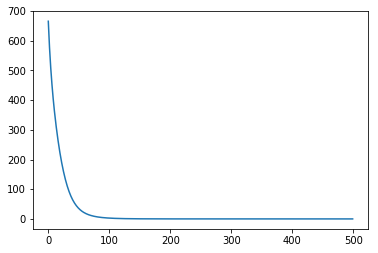

In [21]:
import matplotlib.pyplot as plt 
%matplotlib inline

plt.plot(steps, loss_value)
plt.show()

In [1]:
import torch 

N, D_in, H, D_out = 64, 1000, 100, 10

x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

model = torch.nn.Sequential(torch.nn.Linear(D_in, H), 
                            torch.nn.ReLU(), 
                            torch.nn.Linear(H, D_out))

loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate= 1e-4

steps = []
loss_values = []

for t in range(400):
  y_pred = model(x)
  
  loss = loss_fn(y_pred, y)
  
  print(t, loss.item())
  
  steps.append(t)
  loss_values.append(loss_values)
  
  model.zero_grad()
  
  loss.backward()
  
  with torch.no_grad():
    for param in model.parameters():
      param -= learning_rate*param.grad



0 663.2857055664062
1 614.102294921875
2 571.2380981445312
3 534.0864868164062
4 501.1960754394531
5 471.4364013671875
6 444.3861083984375
7 419.47882080078125
8 396.5430908203125
9 375.1837158203125
10 355.22210693359375
11 336.55474853515625
12 318.9985656738281
13 302.2852783203125
14 286.44207763671875
15 271.42767333984375
16 257.1262512207031
17 243.4230194091797
18 230.39498901367188
19 217.97218322753906
20 206.1031036376953
21 194.78219604492188
22 183.99647521972656
23 173.74026489257812
24 163.96493530273438
25 154.6783447265625
26 145.86312866210938
27 137.47909545898438
28 129.52093505859375
29 121.9815902709961
30 114.83648681640625
31 108.06929779052734
32 101.67021942138672
33 95.62627410888672
34 89.92294311523438
35 84.55017852783203
36 79.4771728515625
37 74.70085906982422
38 70.20832061767578
39 65.97476959228516
40 61.992881774902344
41 58.24607849121094
42 54.7209587097168
43 51.41082000732422
44 48.30459213256836
45 45.388431549072266
46 42.653343200683594
47 40.

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(steps, loss_values)
plt.show()